<a href="https://colab.research.google.com/github/SaurabhSRP/10-Lung-Cancer-Classification/blob/main/Probability_of_Lung_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
pd.set_option('Display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

from sklearn.neighbors import KNeighborsClassifier
knnmodel=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dectree=DecisionTreeClassifier()


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [74]:
df=pd.read_csv("https://raw.githubusercontent.com/SaurabhSRP/10-Lung-Cancer-Classification/main/cancer%20patient%20data%20sets.csv")
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


We dont need "index" and "Patient ID" columns so lets drop them

In [75]:
df.drop(["index","Patient Id"],axis=1,inplace=True)

In [76]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

#**About :**
####**Age**	The age of the patient. (Numeric)
####**Gender**	The gender of the patient. (Categorical)
####**Air Pollution**	The level of air pollution exposure of the patient. (Categorical)
####**Alcohol use**	The level of alcohol use of the patient. (Categorical)
####**Dust Allergy**	The level of dust allergy of the patient. (Categorical)
####**OccuPational Hazards**	The level of occupational hazards of the patient. (Categorical)
####**Genetic Risk**	The level of genetic risk of the patient. (Categorical)
####**chronic Lung Disease**	The level of chronic lung disease of the patient. (Categorical)
####**Balanced Diet**	The level of balanced diet of the patient. (Categorical)
####**Obesity**	The level of obesity of the patient. (Categorical)
####**Smoking**	The level of smoking of the patient. (Categorical)
####**Passive Smoker**	The level of passive smoker of the patient. (Categorical)
####**Chest Pain**	The level of chest pain of the patient. (Categorical)
####**Coughing of Blood**	The level of coughing of blood of the patient. (Categorical)
####**Fatigue**	The level of fatigue of the patient. (Categorical)
####**Weight Loss**	The level of weight loss of the patient. (Categorical)
####**Shortness of Breath**	The level of shortness of breath of the patient. (Categorical)
####**Wheezing**	The level of wheezing of the patient. (Categorical)
####**Swallowing Difficulty**	The level of swallowing difficulty of the patient. (Categorical)
####**Clubbing of Finger Nails**	The level of clubbing of finger nails of the patient. (Categorical)

#**EDA**

As we are dealing with only categorical variables , we can create a loop and get all visualisation in one go

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


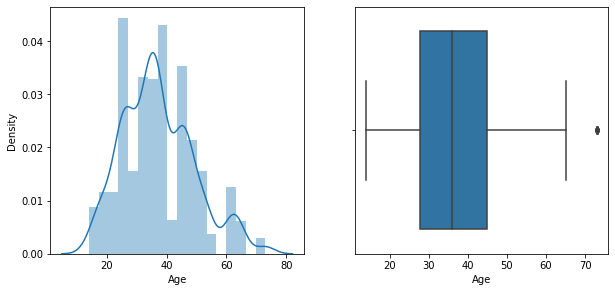

In [78]:

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Age"])

plt.subplot(2,2,2)
sns.boxplot(df["Age"])

###Age seems to be fairly normal distributed so no transformation is required

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

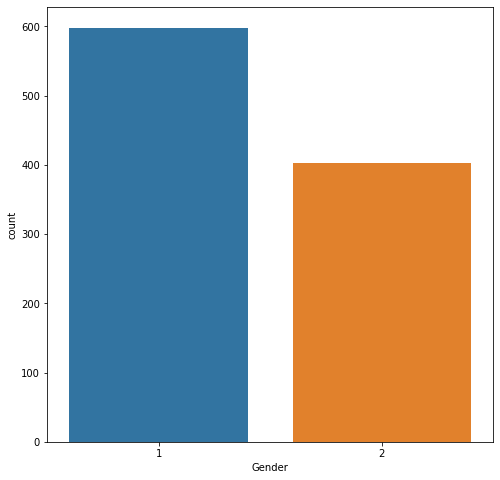

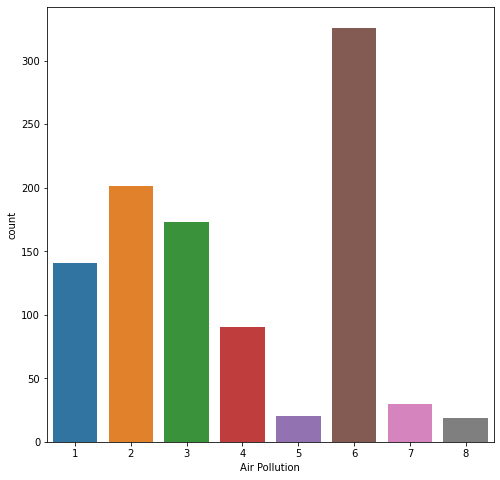

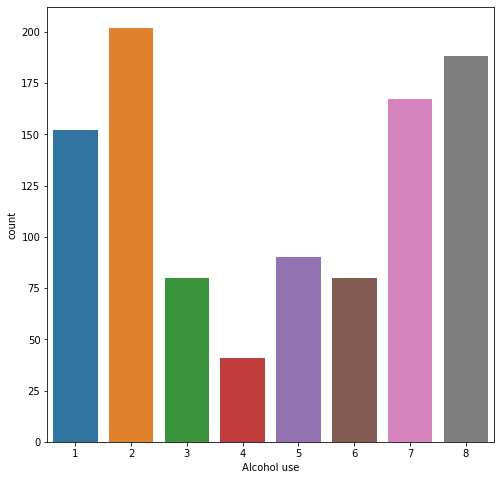

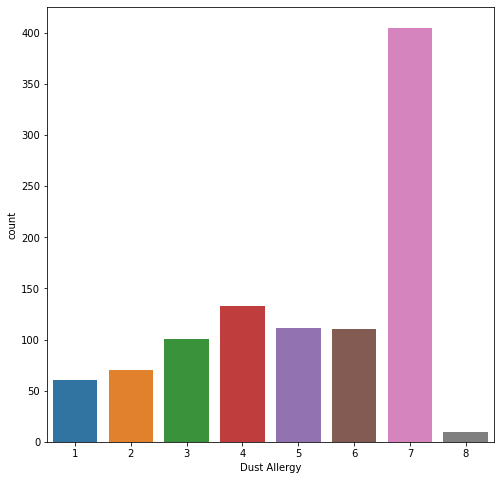

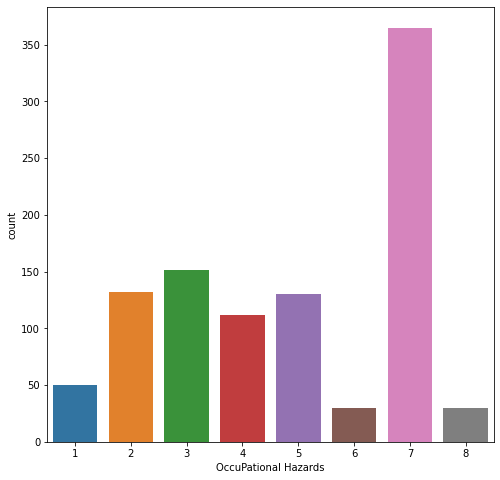

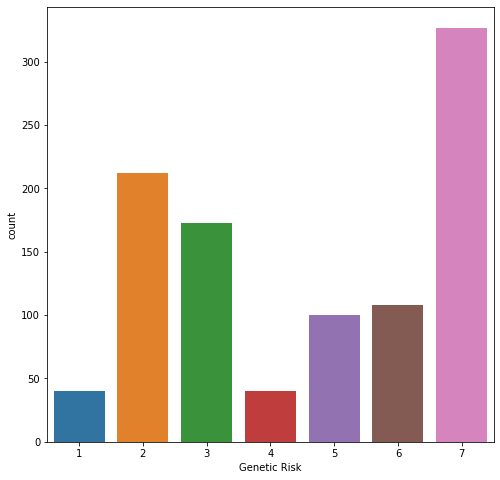

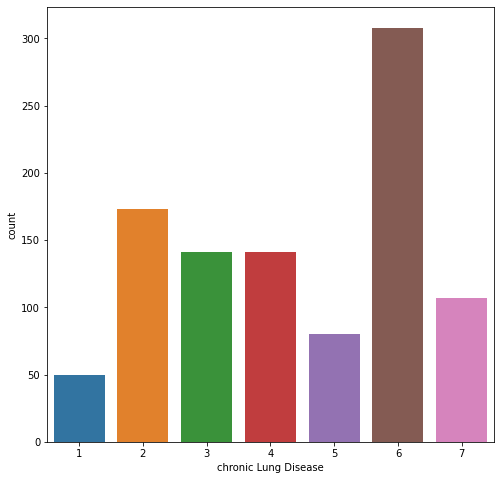

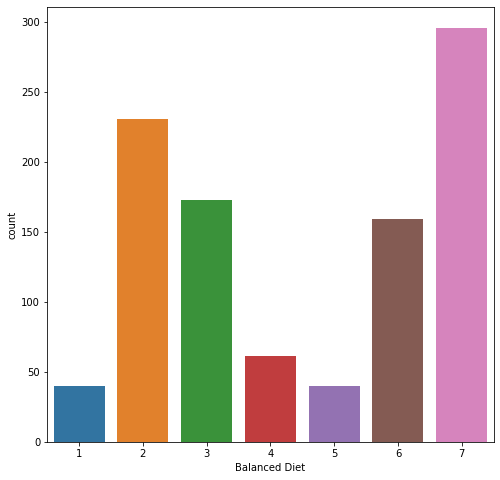

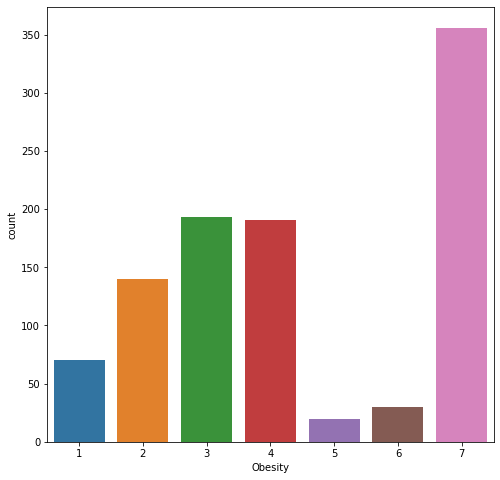

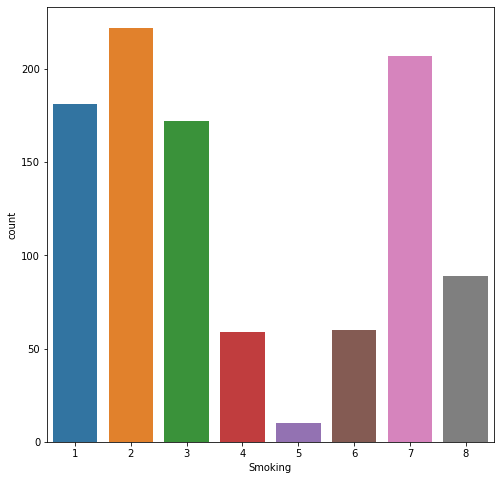

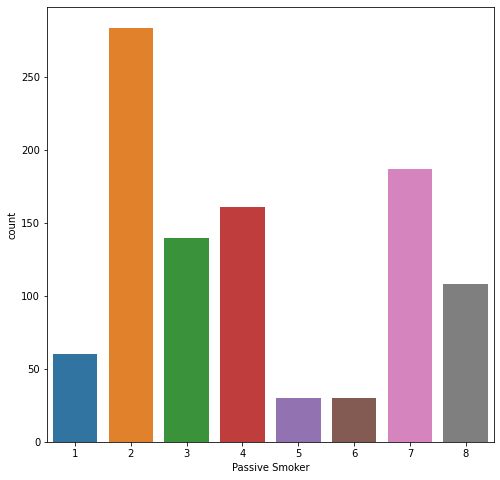

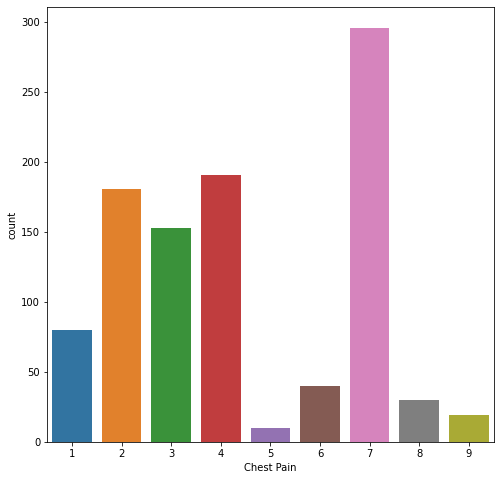

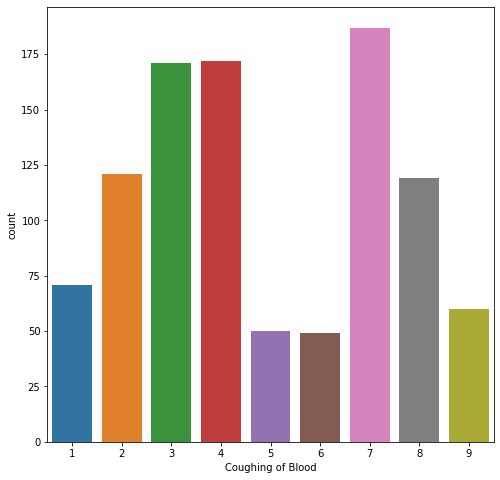

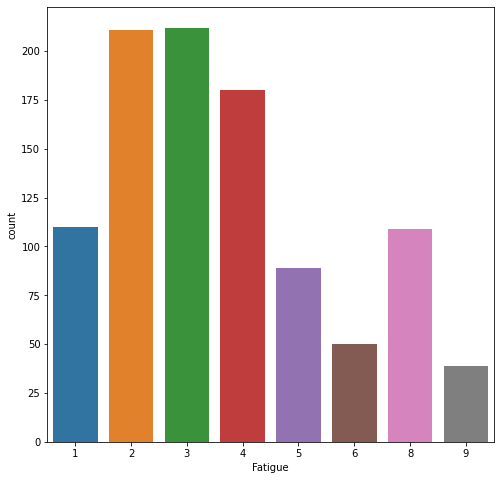

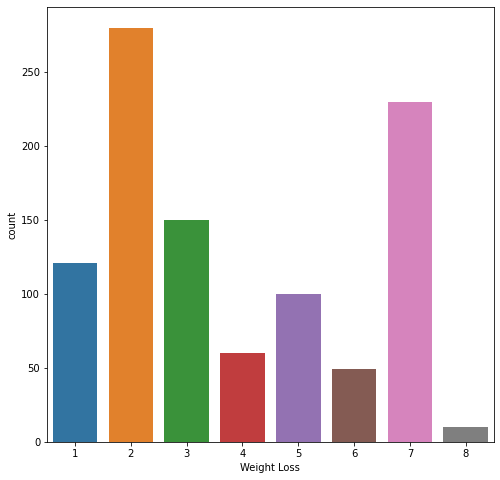

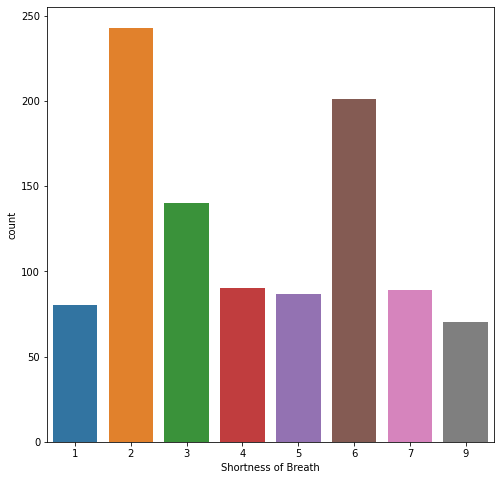

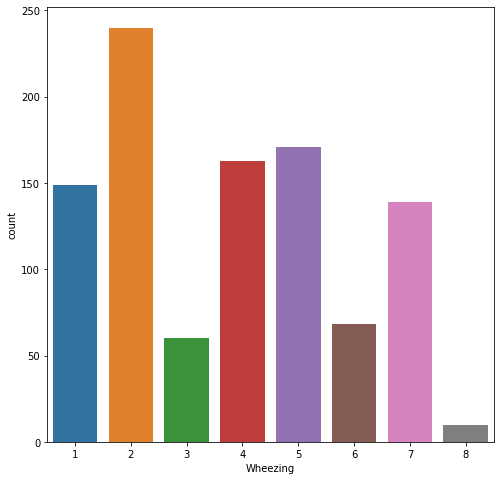

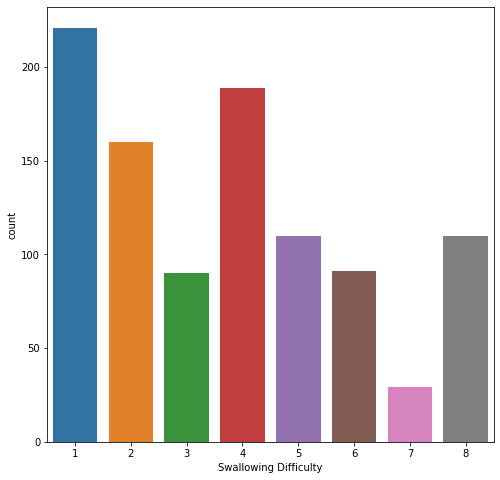

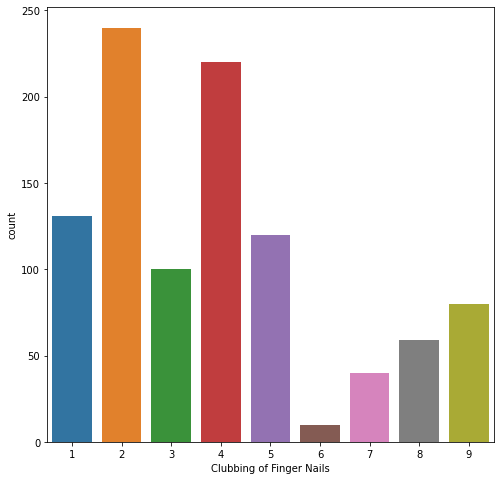

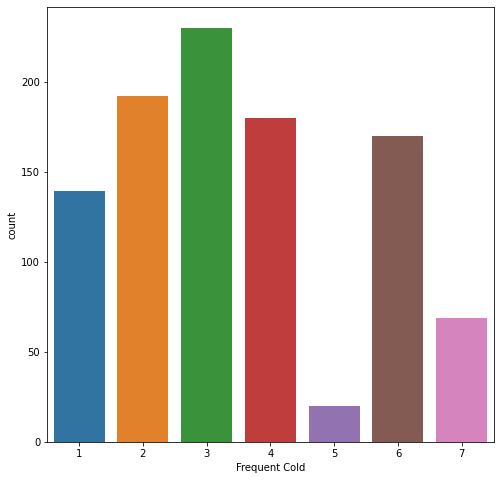

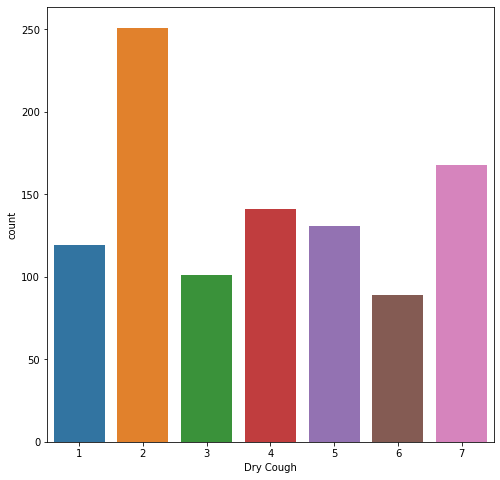

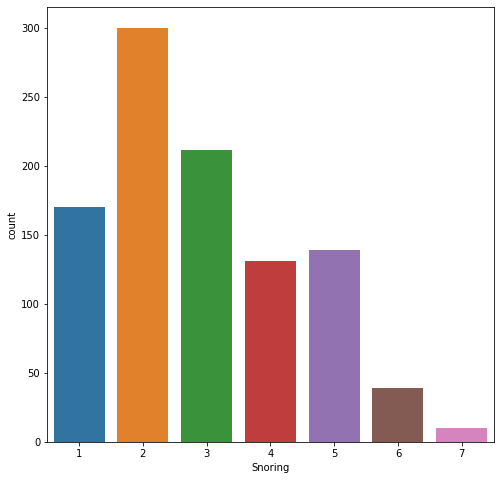

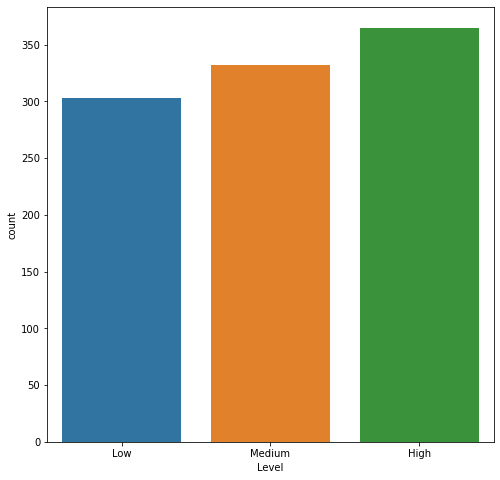

In [79]:
for feature in df.columns:
  if feature != "Age":
    plt.figure(figsize=(8,8))
    sns.countplot(df[feature],data=df)



##This is a well balanced dataset

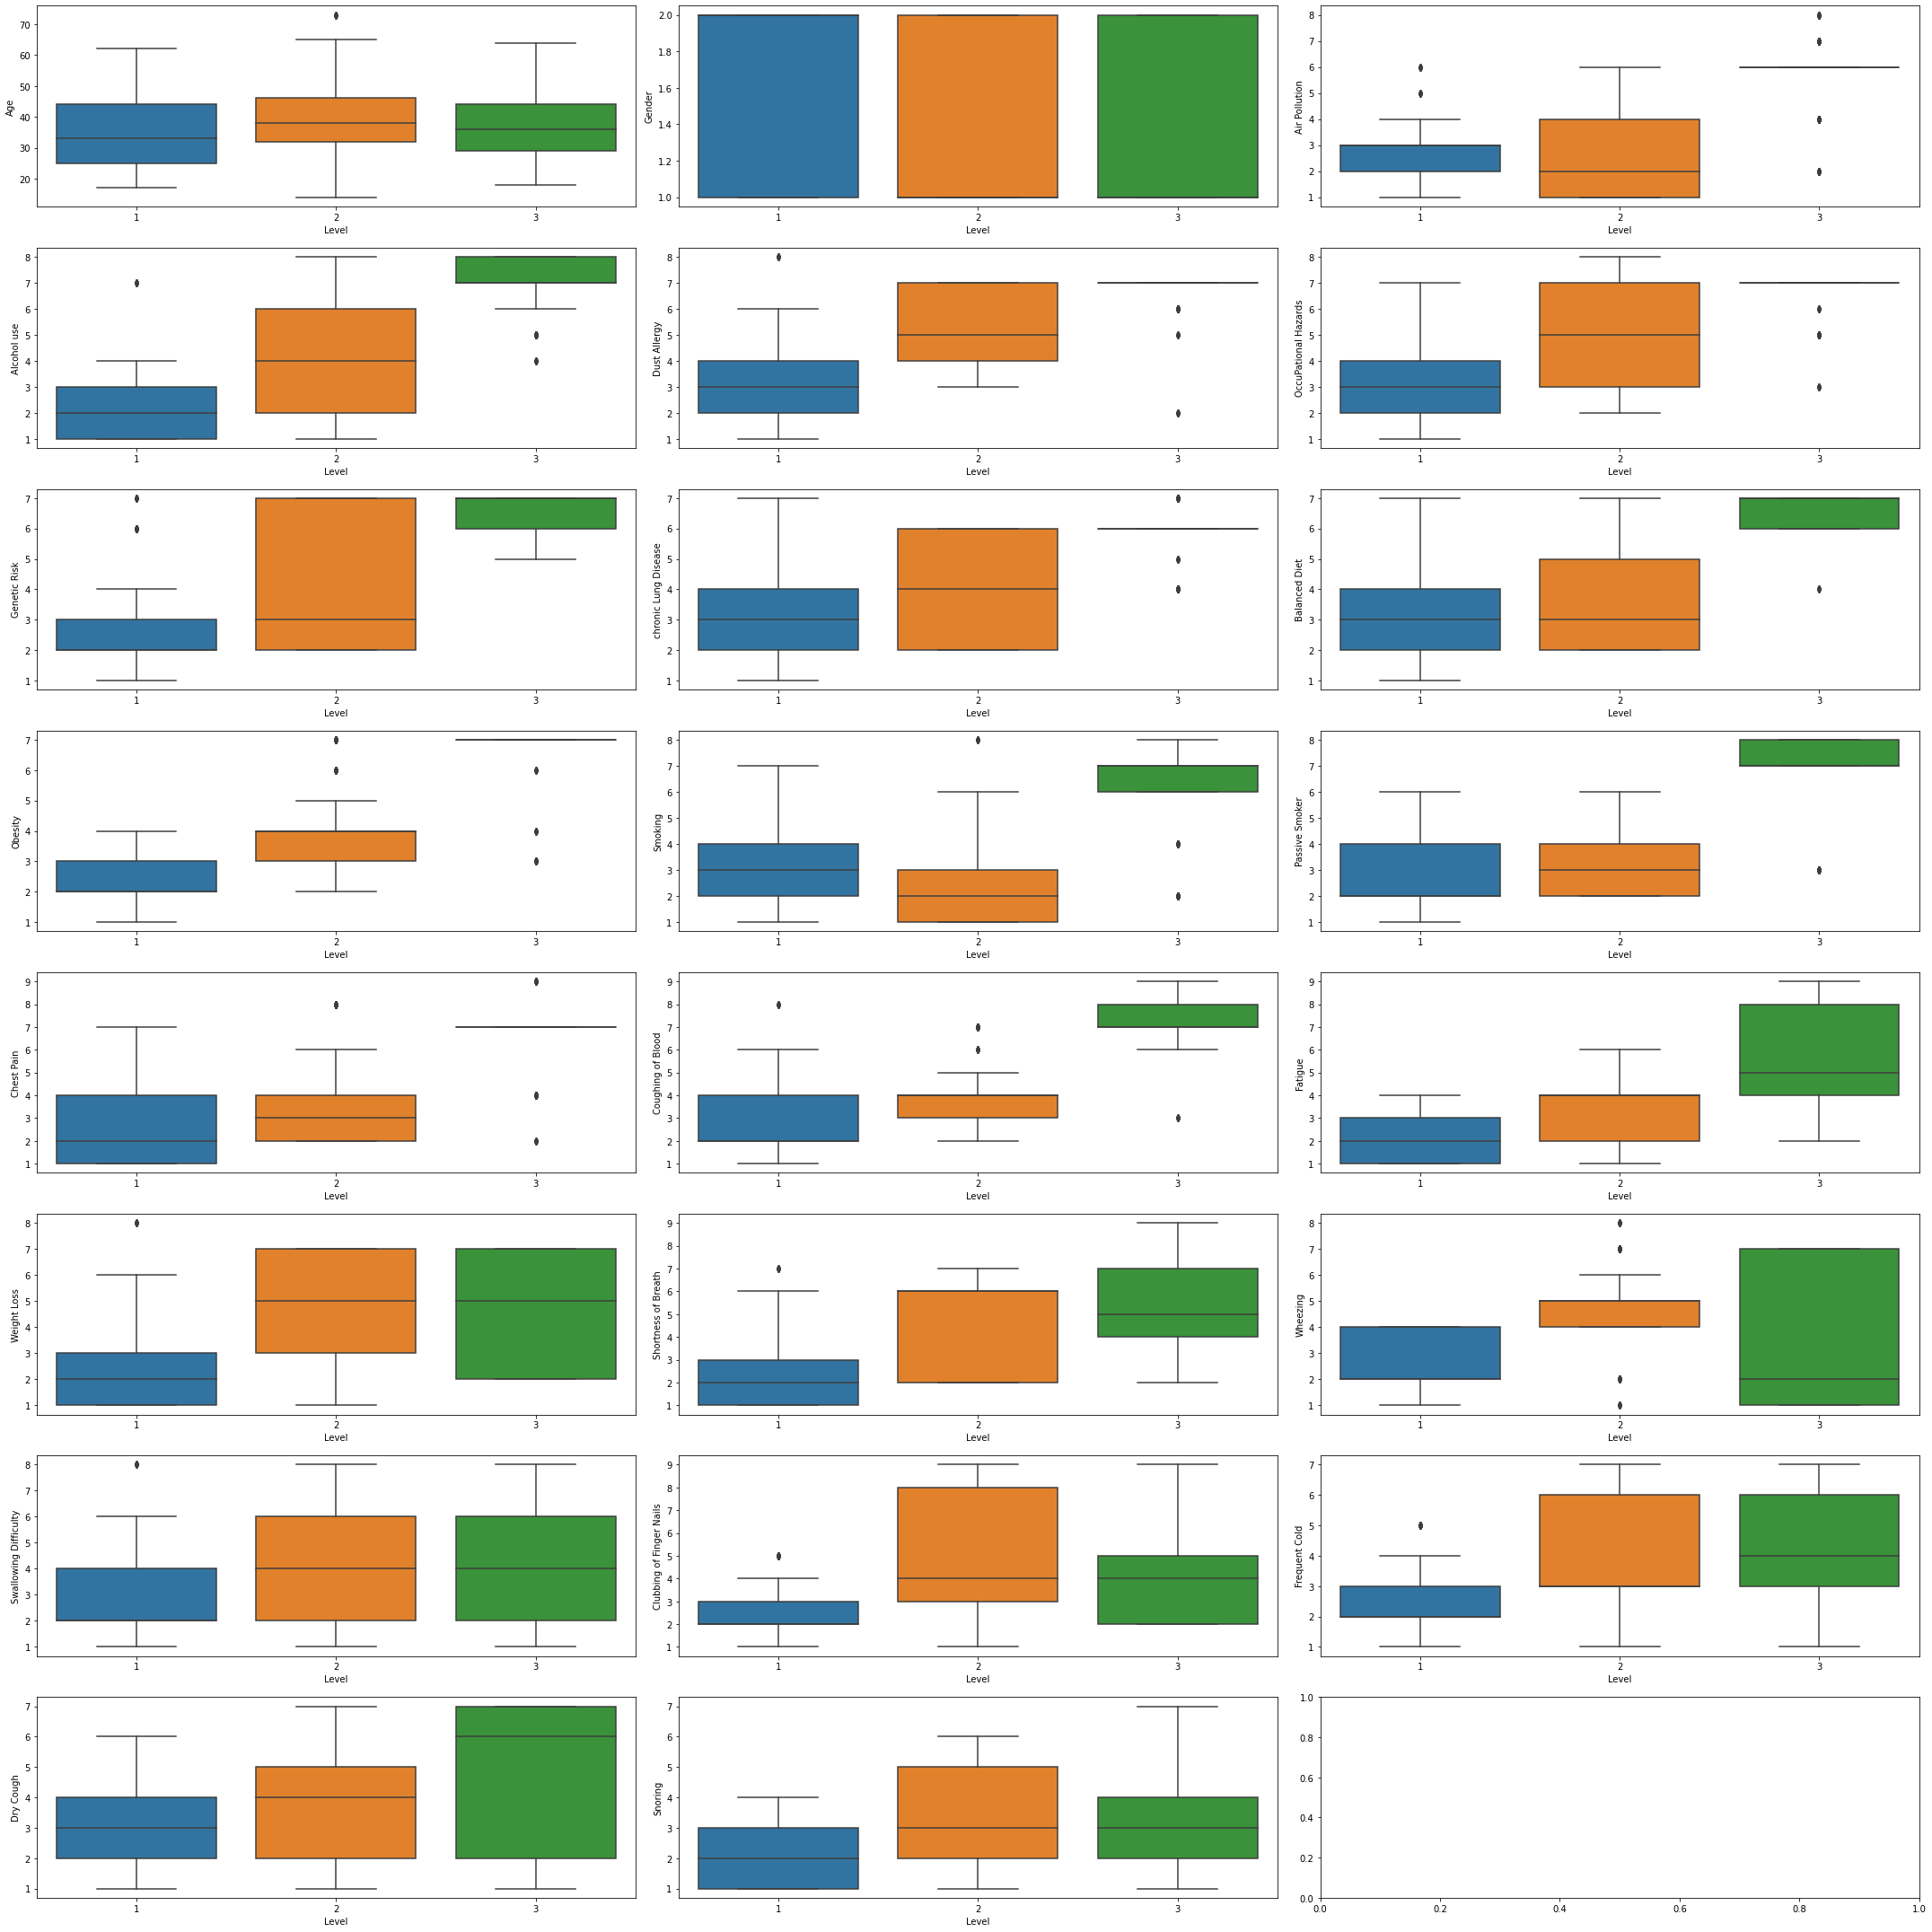

In [92]:
fig,ax = plt.subplots(nrows = 8, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(df.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['Level'], y = df[df.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

#**Encoding dependent Feature**

In [80]:
lvl_map={'Low':1,'Medium':2,'High':3}
df["Level"]=df["Level"].map(lvl_map)

#**Corelation with respect to dependent vairable**

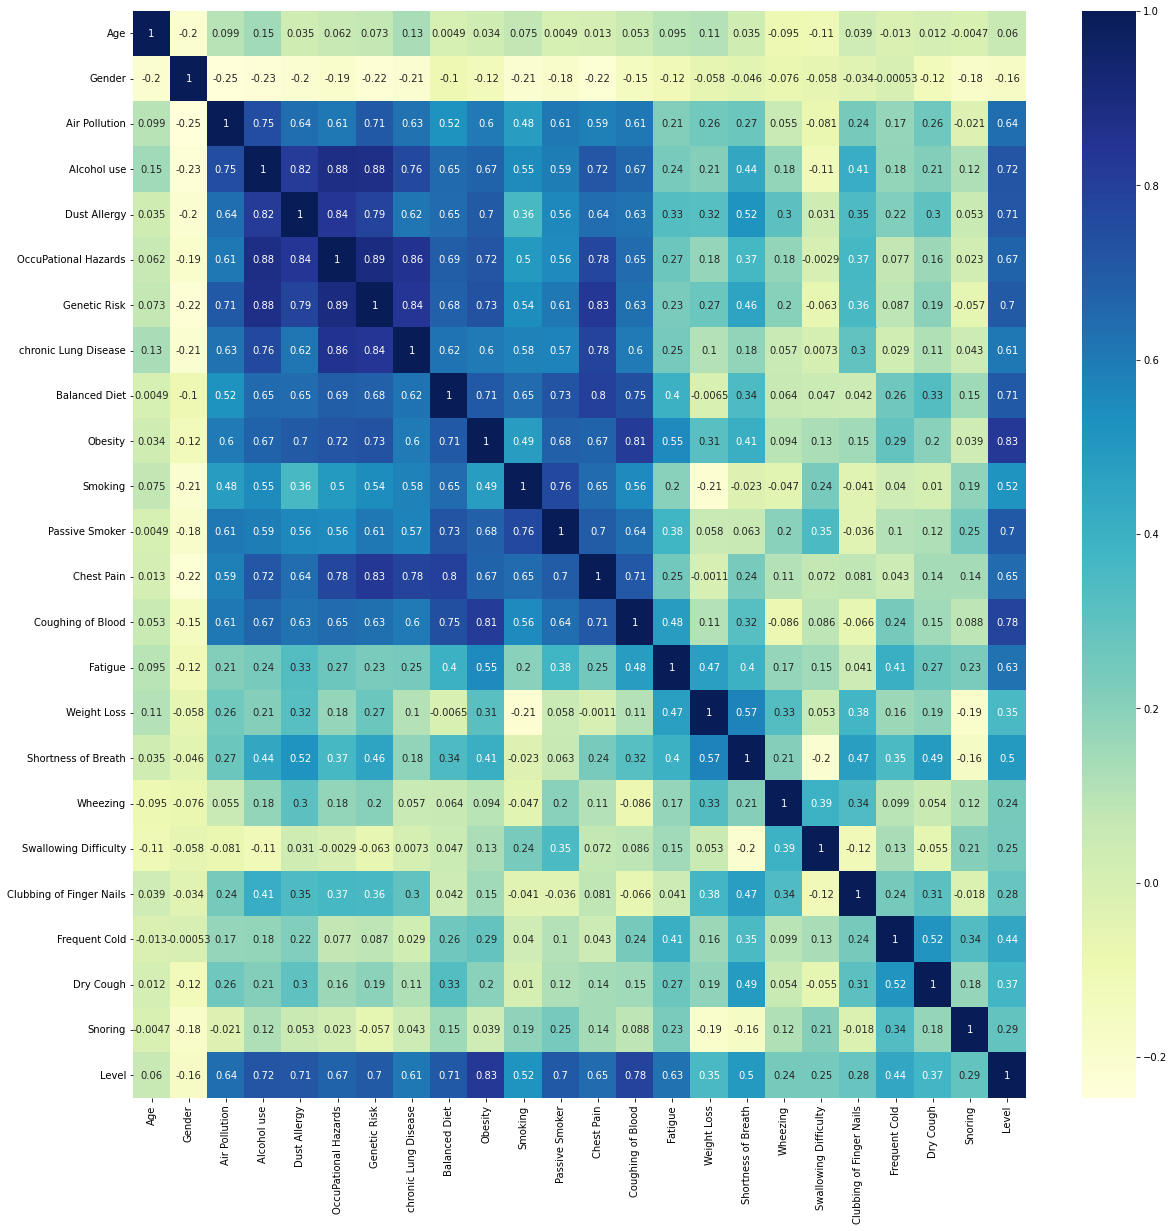

In [96]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

##Observation
there is a lot of multi-corelation among features 


#**Scaling of the feature**
as some of the feature arent in the range of 1-8 so we have to scale and bring it to normal scale

In [81]:
X=df.drop("Level",axis=1)
y=df["Level"]

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [83]:
print(X_train.shape),print(X_test.shape)

(700, 23)
(300, 23)


(None, None)

In [84]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#**KNN algorithm**

In [85]:
knn_model=knnmodel.fit(X_train_scaled,y_train)

In [86]:
knn_pred=knn_model.predict(X_test_scaled)

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00       110
           3       1.00      1.00      1.00       103

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



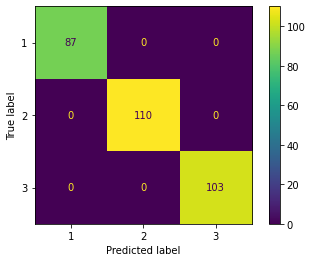

In [87]:
print(accuracy_score(y_test,knn_pred))
print(classification_report(y_test,knn_pred))
ConfusionMatrixDisplay.from_estimator(knn_model,X_test_scaled,y_test)

#**Decision_Tree**

In [88]:
model_dectree=dectree.fit(X_train_scaled,y_train)

In [89]:
dectree_pred=model_dectree.predict(X_test_scaled)

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00       110
           3       1.00      1.00      1.00       103

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



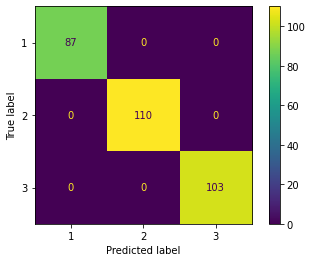

In [90]:
print(accuracy_score(y_test,dectree_pred))
print(classification_report(y_test,dectree_pred))
ConfusionMatrixDisplay.from_estimator(model_dectree,X_test_scaled,y_test)